In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
plt.style.use('ggplot')

In [31]:
train_dir= './data/chest_Xray/train'
test_dir= './data/chest_Xray/test/'
val_dir= './data/chest_Xray/val/'

In [32]:
img_size=(128,128)
batch_size=32

In [33]:
def get_data(data_dir):
    return tf.keras.preprocessing.image_dataset_from_directory(
        data_dir,
        color_mode='grayscale',
        image_size=(128,128),
        batch_size=32
    )

In [34]:
train = get_data(train_dir)
test = get_data(test_dir)
val = get_data(val_dir)

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


In [35]:
def display_image(dataset):
    plt.figure(figsize= (10,10))
    for images, labels in dataset.take(1):
        for i in range(9):
            plt.subplot(3,3,i+1)
            plt.imshow(np.squeeze(images[i].numpy().astype('uint8')), cmap='gray')
            plt.title(dataset.class_names[labels[i]])
            plt.axis('off')


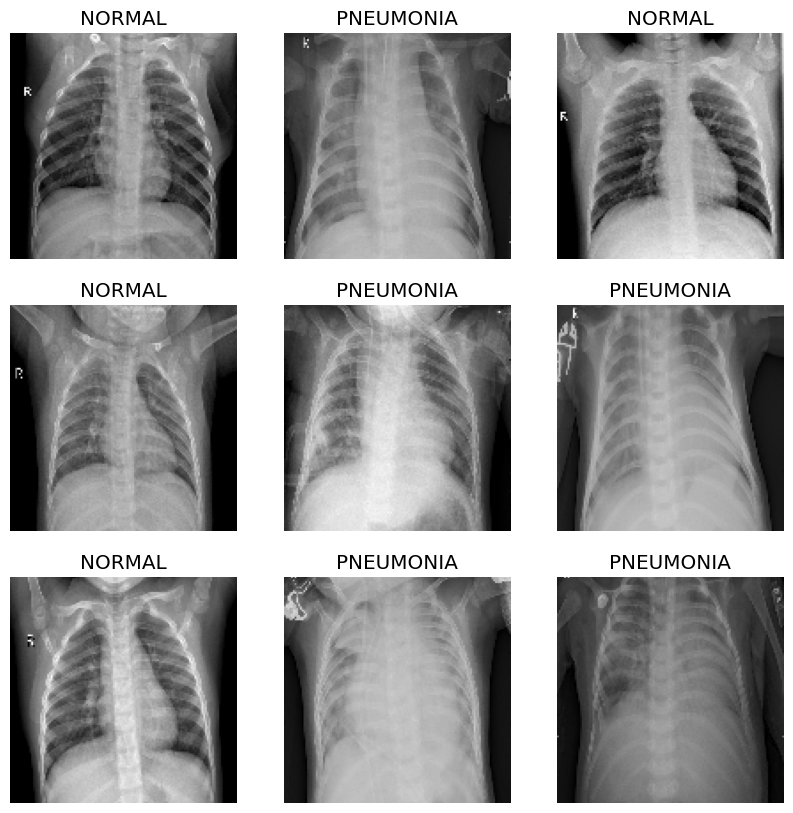

In [36]:
display_image(train)

In [37]:
def plot_distribution(dataset,title):
    labels = []
    for images, lbls in dataset:
        labels.extend(lbls.numpy())

    labels_count = {label: labels.count(label) for label in set(labels)}
    colors = ['skyblue', 'lightcoral']

    plt.bar(labels_count.keys(), labels_count.values(), color=colors)
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.title(f'Distribution of PNEUMONIA and NORMAL in {title} Dataset')
    plt.xticks(ticks=[0, 1], labels=["NORMAL", "PNEUMONIA"])
    plt.show()

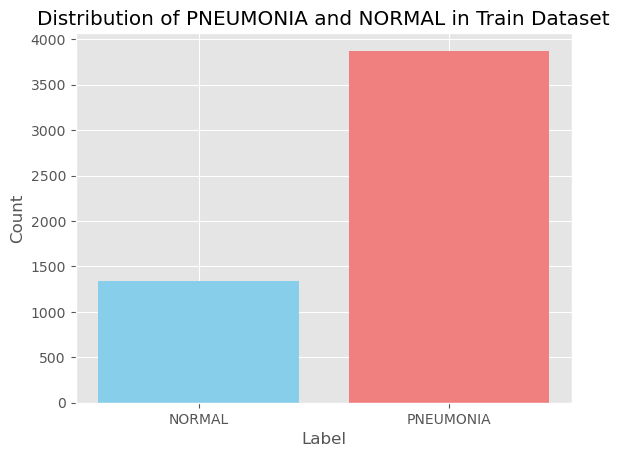

In [38]:
plot_distribution(train, 'Train')

In [39]:
def dataset_to_numpy(dataset):
    images = []
    labels = []

    for batch in dataset:
        batch_images, batch_labels = batch
        images.extend(batch_images.numpy())
        labels.extend(batch_labels.numpy())

    images = np.array(images)
    labels = np.array(labels)

    return images, labels

train_images, train_labels = dataset_to_numpy(train)
val_images, val_labels = dataset_to_numpy(val)
test_images, test_labels = dataset_to_numpy(test)

In [40]:
X = np.concatenate((train_images, val_images, test_images), axis=0)
y = np.concatenate((train_labels, val_labels, test_labels), axis=0)

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

In [42]:
print('Train set shape',X_train.shape)
print('Test set shape',X_test.shape)
print('Target shape',y_train.shape)
print('Target test shape',y_test.shape)

Train set shape (4684, 128, 128, 1)
Test set shape (1172, 128, 128, 1)
Target shape (4684,)
Target test shape (1172,)


In [43]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [46]:
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1))),
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [47]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,661,633 (6.34 MB)

 Trainable params: 1,661,633 (6.34 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
import tensorflow.keras as keras

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', keras.metrics.Recall(), keras.metrics.F1Score()])

In [49]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=50,
                    validation_split=0.1)

Epoch 1/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 16s 110ms/step - accuracy: 0.7442 - f1_score: 0.8142 - loss: 14.6534 - recall_2: 0.8517 - val_accuracy: 0.9424 - val_f1_score: 0.8260 - val_loss: 0.1446 - val_recall_2: 0.9667
Epoch 2/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 14s 105ms/step - accuracy: 0.9437 - f1_score: 0.8476 - loss: 0.1569 - recall_2: 0.9647 - val_accuracy: 0.9510 - val_f1_score: 0.8260 - val_loss: 0.1839 - val_recall_2: 0.9455
Epoch 3/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 14s 106ms/step - accuracy: 0.9445 - f1_score: 0.8471 - loss: 0.1536 - recall_2: 0.9610 - val_accuracy: 0.9062 - val_f1_score: 0.8260 - val_loss: 0.2597 - val_recall_2: 0.9879
Epoch 4/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 14s 107ms/step - accuracy: 0.9568 - f1_score: 0.8425 - loss: 0.1176 - recall_2: 0.9745 - val_accuracy: 0.9510 - val_f1_score: 0.8260 - val_loss: 0.1366 - val_recall_2: 0.9697
Epoch 5/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 15s 112ms/step - accuracy: 0.9496 - f1_score: 0.8467 - loss: 0.1342 - recall_2: 0.9702 - val_accura

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
f1_score = history.history['f1_score']
val_f1_score = history.history['val_f1_score']
recall = history.history['recall_2']
val_recall = history.history['val_recall_2']

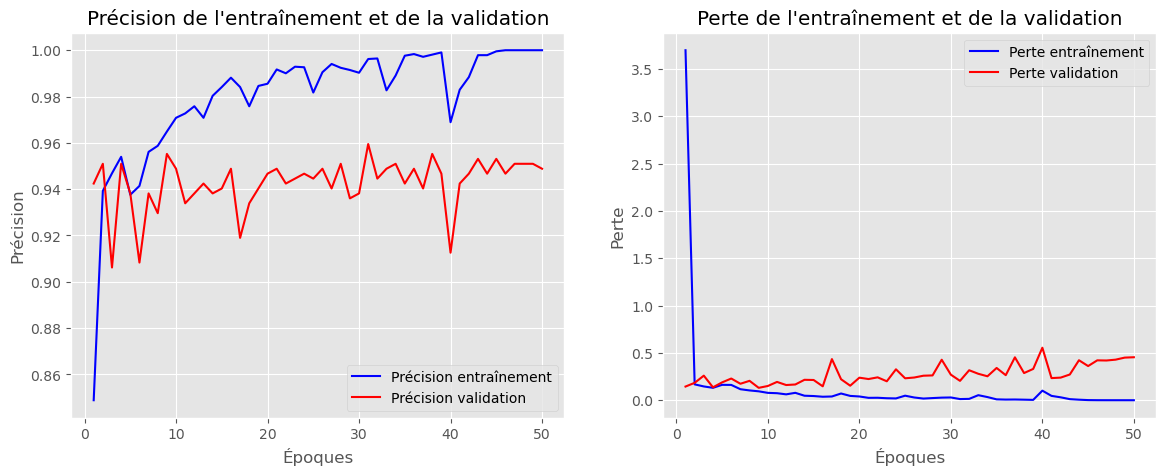

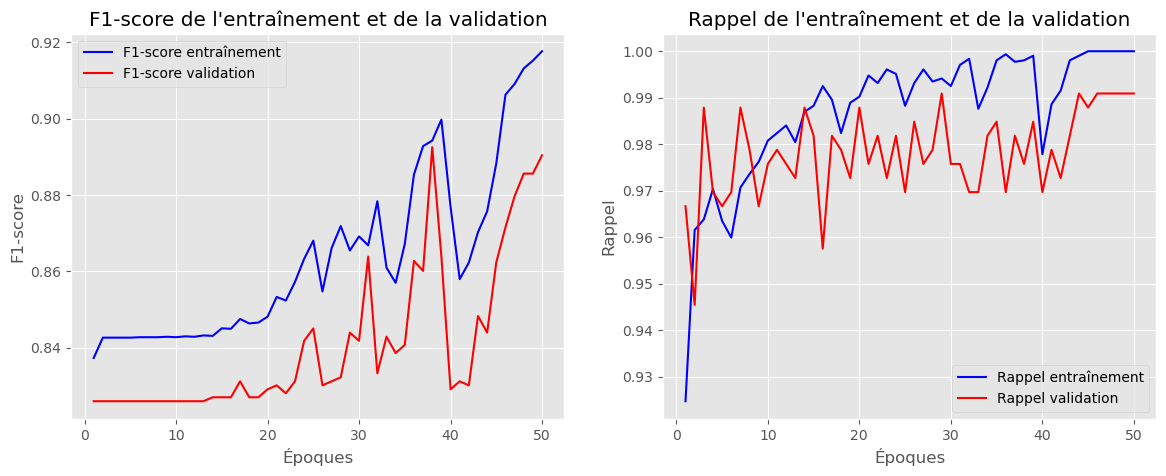

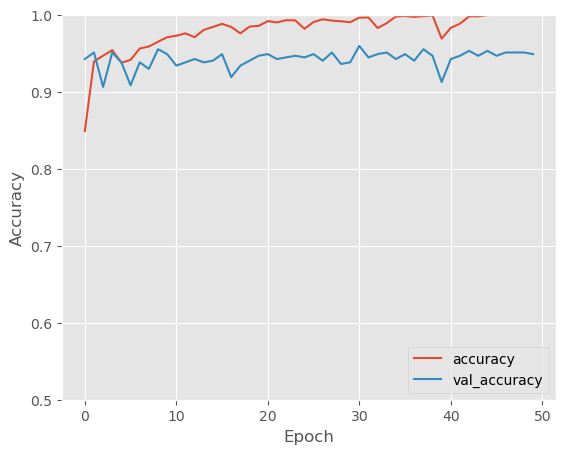

In [51]:

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Précision entraînement')
plt.plot(epochs, val_acc, 'r', label='Précision validation')
plt.title('Précision de l\'entraînement et de la validation')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Perte entraînement')
plt.plot(epochs, val_loss, 'r', label='Perte validation')
plt.title('Perte de l\'entraînement et de la validation')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()

plt.show()

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, f1_score, 'b', label='F1-score entraînement')
plt.plot(epochs, val_f1_score, 'r', label='F1-score validation')
plt.title('F1-score de l\'entraînement et de la validation')
plt.xlabel('Époques')
plt.ylabel('F1-score')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, recall, 'b', label='Rappel entraînement')
plt.plot(epochs, val_recall, 'r', label='Rappel validation')
plt.title('Rappel de l\'entraînement et de la validation')
plt.xlabel('Époques')
plt.ylabel('Rappel')
plt.legend()


plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [52]:
test_loss, test_accuracy, test_recall, test_f1_score = model.evaluate(X_test, y_test, verbose=2)

37/37 - 2s - 47ms/step - accuracy: 0.9539 - f1_score: 0.9123 - loss: 0.4512 - recall_2: 0.9748


In [53]:
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Recall: {test_recall}')
print(f'Test F1 Score: {test_f1_score}')


Test Loss: 0.45118212699890137
Test Accuracy: 0.9539248943328857
Test Recall: 0.9748283624649048
Test F1 Score: 0.9123172760009766


In [54]:
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")

37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step


In [55]:
from sklearn.metrics import classification_report

print("Classification Report")
print(classification_report(y_test, y_pred_classes))

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       298
           1       0.96      0.97      0.97       874

    accuracy                           0.95      1172
   macro avg       0.94      0.93      0.94      1172
weighted avg       0.95      0.95      0.95      1172



              precision    recall  f1-score   support

           0       0.92      0.89      0.91       298
           1       0.96      0.97      0.97       874

    accuracy                           0.95      1172
   macro avg       0.94      0.93      0.94      1172
weighted avg       0.95      0.95      0.95      1172



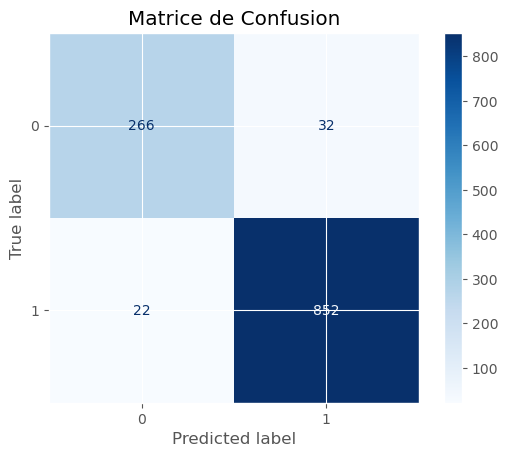

In [56]:
print(classification_report(y_test, y_pred_classes))
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

confusion_matrix = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de Confusion")
plt.show()